In [31]:
# Last bibliotek
import pandas as pd

In [34]:
# Last inn data
df = pd.read_csv('../data/mock_sysselsatte/population_2019_30000.csv')

### Histogram over aldersfordeling

<AxesSubplot:>

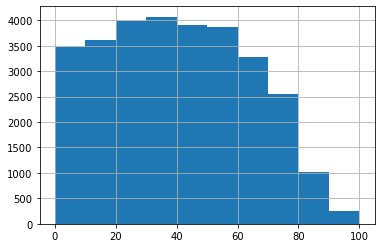

In [36]:
df['age'].hist()

### Linjeplot av gjennomsnittlig arbeidsprosent blant arbeidstakere etter alder

In [58]:
# Ta radene hvor det er ansatte
df2 = df[df['work_id'].notna()]
df2.sample(10)

,Unnamed: 0,id,work_id,sex,age,year_birth,work_percent,AlderGjennomsnittArbeidsprosent
3919,3919,7057851840,383902895.0,Menn,41,1978,100.0,92.860248
25310,25310,5126391433,908527378.0,Kvinner,56,1963,100.0,87.818966
24763,24763,7097240337,884806924.0,Kvinner,47,1972,100.0,92.949045
26275,26275,26027483723,316336661.0,Kvinner,45,1974,100.0,92.704180
20866,20866,14117590143,427362198.0,Kvinner,44,1975,100.0,93.739938
28663,28663,18084891218,738118183.0,Kvinner,71,1948,NaN,64.250000
8880,8880,25096377632,433459525.0,Menn,56,1963,100.0,87.818966
12349,12349,17017447328,858004792.0,Menn,45,1974,100.0,92.704180
7630,7630,6099080908,958992622.0,Menn,29,1990,100.0,90.825658
7906,7906,9057695998,14114264.0,Menn,43,1976,100.0,93.614085


In [59]:
# Grupper etter alder, ta gjennomsnitt, reset alder tilbake fra "index"
df2 = df2.groupby('age').mean().reset_index()
df2.head()

,age,Unnamed: 0,id,work_id,year_birth,work_percent,AlderGjennomsnittArbeidsprosent
0,15,10109.169355,1.603198e+10,5.121606e+08,2004.0,59.645161,59.645161
1,16,11870.316667,1.644285e+10,4.484204e+08,2003.0,51.375000,51.375000
2,17,10534.468750,1.641650e+10,5.005850e+08,2002.0,52.984615,52.984615
3,18,10333.155405,1.540231e+10,4.370536e+08,2001.0,54.824427,54.824427
4,19,10682.515337,1.600152e+10,5.056541e+08,2000.0,55.954198,55.954198


In [60]:
# Behold bare disse radene
df2 = df2[['age', 'work_percent']]
df2.head()

,age,work_percent
0,15,59.645161
1,16,51.375000
2,17,52.984615
3,18,54.824427
4,19,55.954198


<AxesSubplot:xlabel='age'>

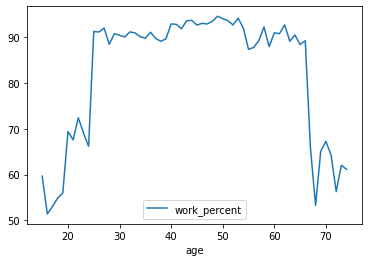

In [61]:
df2.plot('age', 'work_percent')

### Bonus: Påfør gjennomsnittlig arbeidsprosent på alder tilbake på hoveddatasett

In [66]:
# For hver rad i "omkodingskatalogen"
for r, i in df2.iterrows():
    # Finn de radene som matcher på alder
    df.loc[ (df['age'] == i['age']) 
        # Og work_id ikke er tom
       & (df['work_id'].notna())
           # i denne nye kolonnen = påfør en avrundet arbeidsprosent fra katalogen
        , 'AlderGjennomsnittArbeidsprosent'] = round(i['work_percent'])
    
    #One-liner:
    #df.loc[ (df['age'] == i['age']) & (df['work_id'].notna()), 'AlderGjennomsnittArbeidsprosent'] = round(i['work_percent'])

In [67]:
# Se på et par av radene, som inneholder data om dette
df[df['work_id'].notna()][['age', 'AlderGjennomsnittArbeidsprosent', 'work_percent']].sample(10)

,age,AlderGjennomsnittArbeidsprosent,work_percent
20291,29,91.0,61.0
22651,30,90.0,100.0
28517,71,64.0,11.0
18602,44,94.0,100.0
25658,60,91.0,100.0
7402,42,92.0,100.0
4143,33,91.0,100.0
12422,52,93.0,100.0
20972,35,90.0,100.0
26025,52,93.0,55.0
